In [2]:
# Import the nessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# read the dataset

df = pd.read_csv('Indian Airlines.csv')
df.head(5)
     

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.shape

(300153, 12)

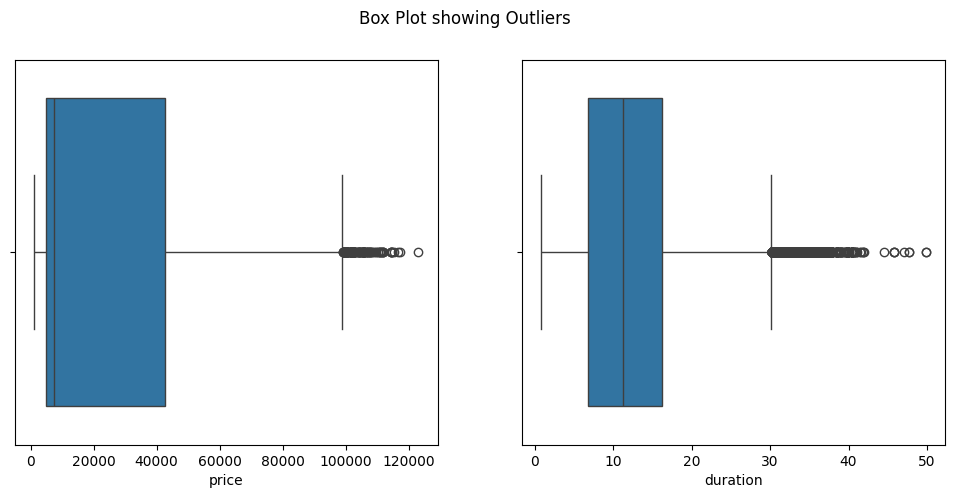

In [7]:
# As we can see there are outliers, we have to remove them from both of the Columns

fig, axes = plt.subplots(1,2, figsize = (12,5))                                  
sns.boxplot(x = 'price', data = df, ax = axes[0])
sns.boxplot(x = 'duration', data = df, ax = axes[1])
plt.suptitle('Box Plot showing Outliers')
plt.show()

In [10]:
# No null values in the dataset

df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

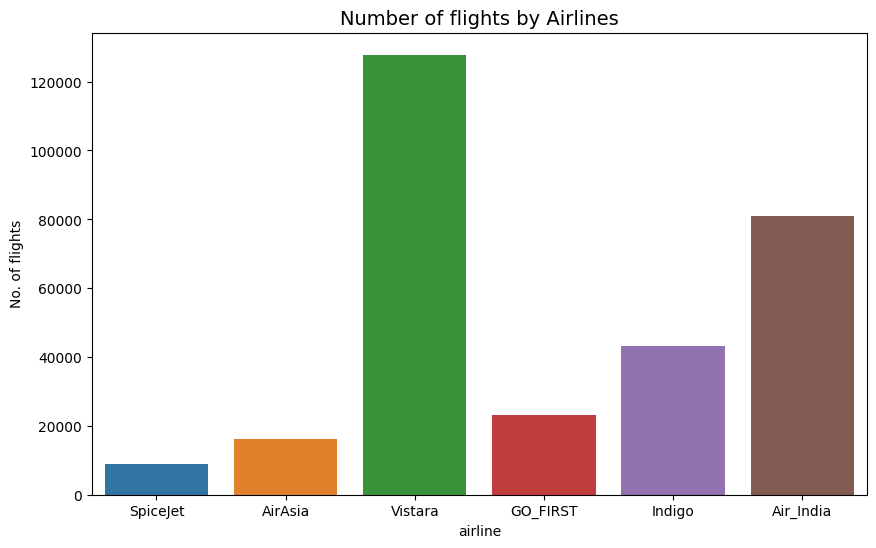

In [ ]:
# Exploratory Data Analysis
# From the above figure, we can see 'Vistara' has maximum no. of fights followed by 'Air India' while 'Spice Jet' has least no. of flights.
# 1. What are number of flights operated by each airline?
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'airline', hue = 'airline')
plt.title('Number of flights by Airlines', fontsize = 14)
plt.ylabel('No. of flights')
plt.show()
     


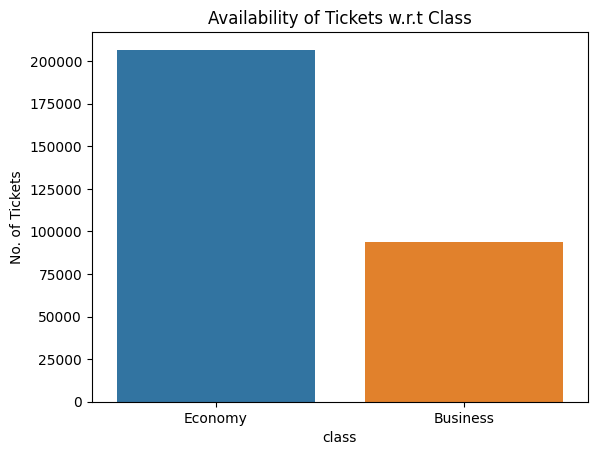

In [ ]:
# There are nearly twice as many Economy tickets as Business tickets because only Air India and Vistara offer Business class, while all airlines offer Economy.
# 2. What is availability of Tickets according to class of travel?

sns.countplot(data = df, x = 'class', hue = 'class')
plt.title('Availability of Tickets w.r.t Class')
plt.ylabel('No. of Tickets')
plt.show()

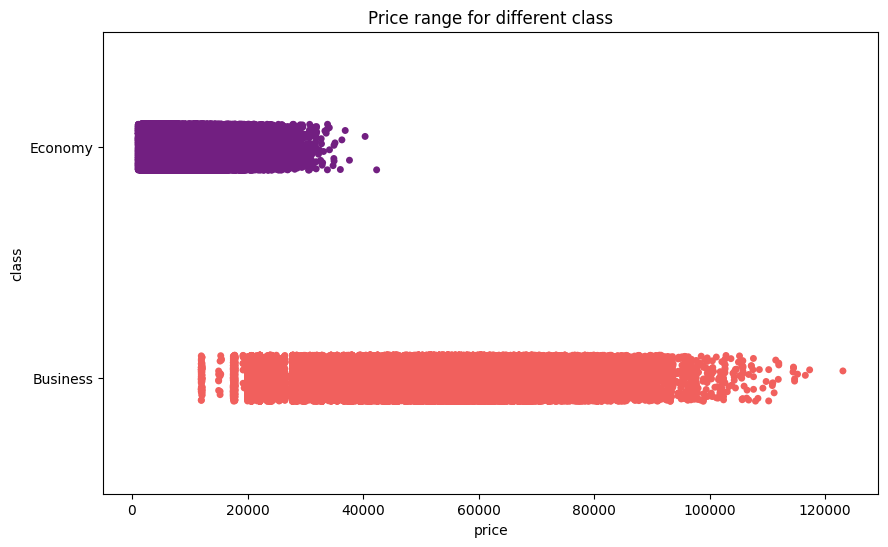

In [ ]:
# Economy tickets range from ₹2,500–₹22,500, while Business tickets range from ₹25,000–₹96,000.
# 3.What is price range according to class of travel?

plt.figure(figsize = (10,6))
sns.stripplot(data = df, x = 'price', y = 'class', hue = 'class', palette = 'magma')
plt.title('Price range for different class', fontsize = 12)
plt.show()

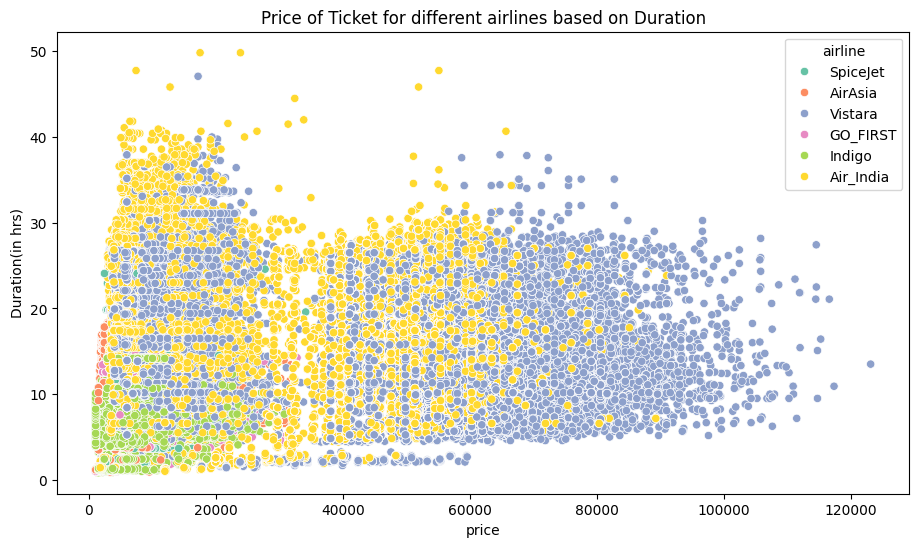

In [ ]:
#Ticket price distribution varies with flight duration, with more blue and yellow points as Vistara and Air India operate the most flights.
#4.What is price of ticket for different airlines based on duration of flight?

plt.figure(figsize = (11,6))
sns.scatterplot(data = df, x = 'price', y = 'duration', hue = 'airline', palette = 'Set2')
plt.title('Price of Ticket for different airlines based on Duration')
plt.ylabel('Duration(in hrs)')
plt.show()
     


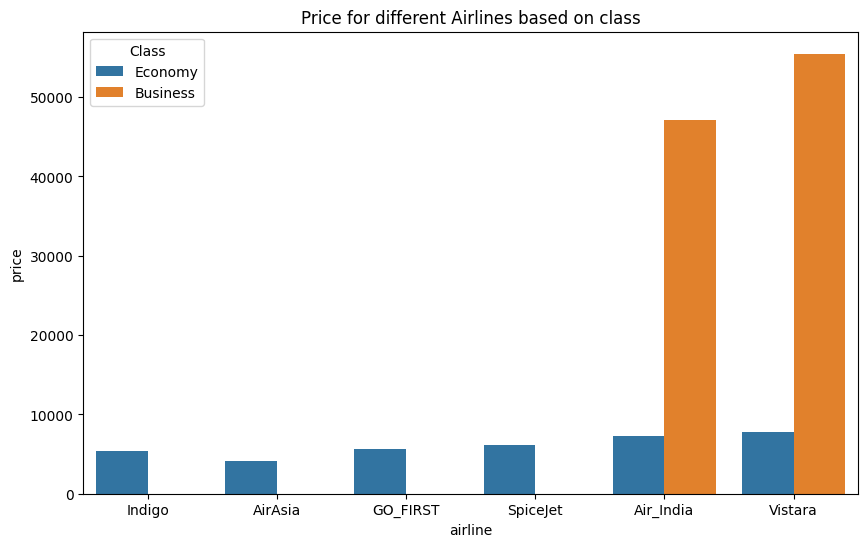

In [ ]:
# 5. How do ticket prices vary across different airlines and class of travel?
# Air Asia offers the cheapest Economy fares, with Indigo, Go First, and SpiceJet priced similarly. Air India and Vistara, being full-service carriers, charge higher, while Vistara’s Business fares exceed Air India’s, likely due to better service and seats.

plt.figure(figsize = (10,6))
sns.barplot(data = df.sort_values('price'), x = 'airline', y = 'price', hue = 'class', errorbar = None)       # I sorted the data to asc to desc for a better graph
plt.legend(title = 'Class', loc = 'upper left')
plt.title('Price for different Airlines based on class')
plt.show()


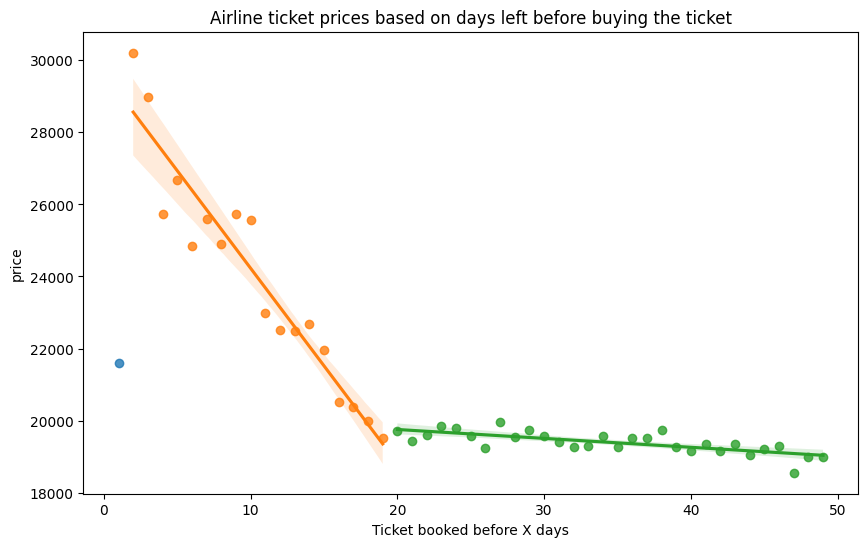

In [ ]:
# 6. How do airline ticket prices vary depending on when you buy them?
# Ticket prices rise slowly until 20 days before departure, then sharply until the last day, dropping dramatically 1 day prior as airlines try to fill seats and reduce per-passenger costs.

df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize = (10,6))
ax = plt.axes()
sns.regplot(x = df_temp.loc[df_temp['days_left'] == 1].days_left, y = df_temp.loc[df_temp['days_left'] == 1].price, data= df_temp, fit_reg= False, ax=ax)
sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True, ax=ax)
sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True, ax=ax)
plt.title('Airline ticket prices based on days left before buying the ticket')
plt.xlabel('Ticket booked before X days')
plt.show()
     

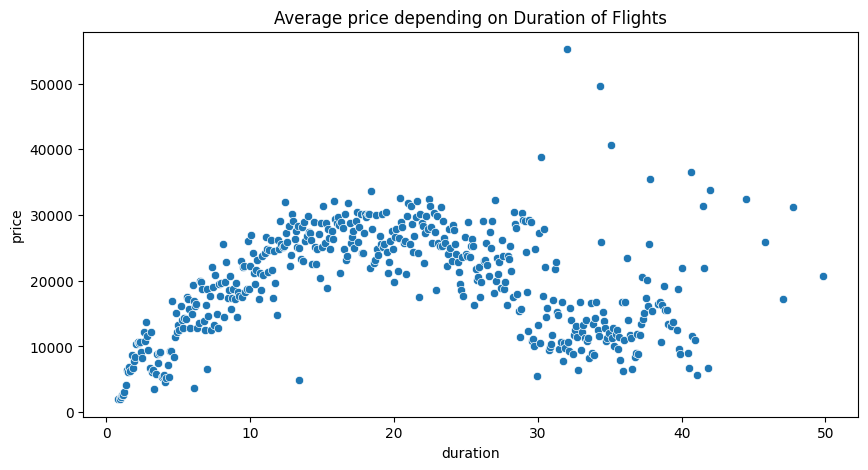

In [18]:
# 7. How does price of ticket vary depending on duration of flight?
#Prices rise with flight duration up to 20 hours, then drop, forming a curved trend with some outliers.

df_ticket = df.groupby('duration')['price'].mean().reset_index()
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'duration', y = 'price', data = df_ticket)
plt.title('Average price depending on Duration of Flights')
plt.show()

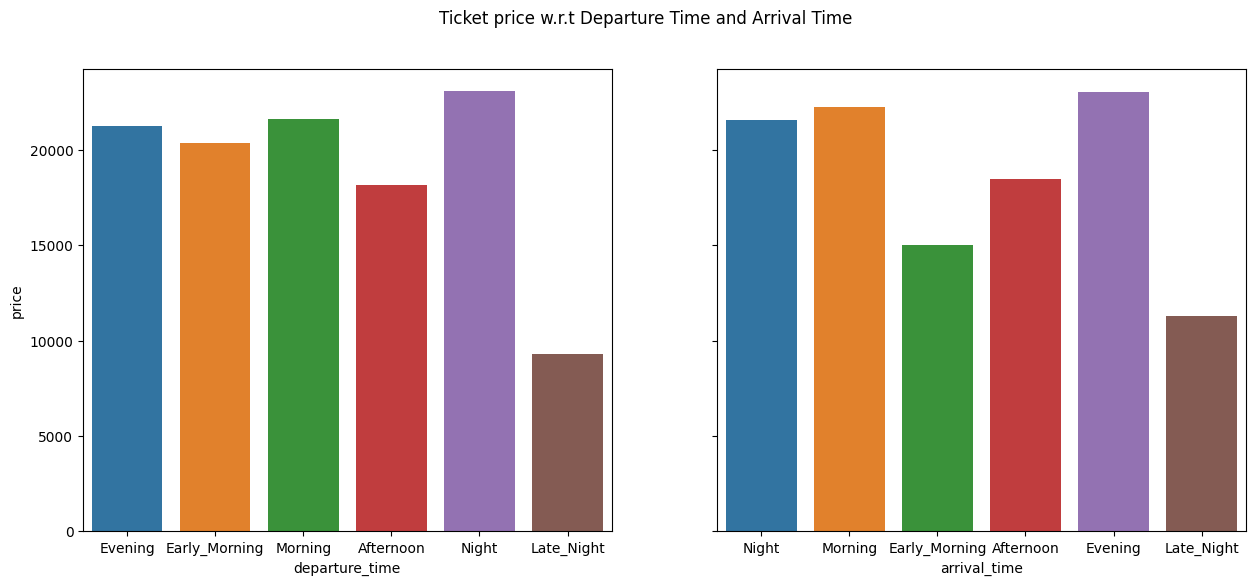

In [19]:
# 8. How does ticket price vary according to departure time and arrival time?
## Step 1: Understand the problem
# Late-night departures are cheapest, with early-morning, late-night arrivals, and afternoon departures also relatively cheap.


fig, axes = plt.subplots(1,2, sharey = True, figsize = (15,6))
sns.barplot(x = 'departure_time', y = 'price', data = df, hue = 'departure_time', errorbar = None, ax = axes[0])
sns.barplot(x = 'arrival_time', y = 'price', data = df, hue = 'arrival_time', errorbar = None, ax = axes[1])
plt.suptitle('Ticket price w.r.t Departure Time and Arrival Time')
plt.show()


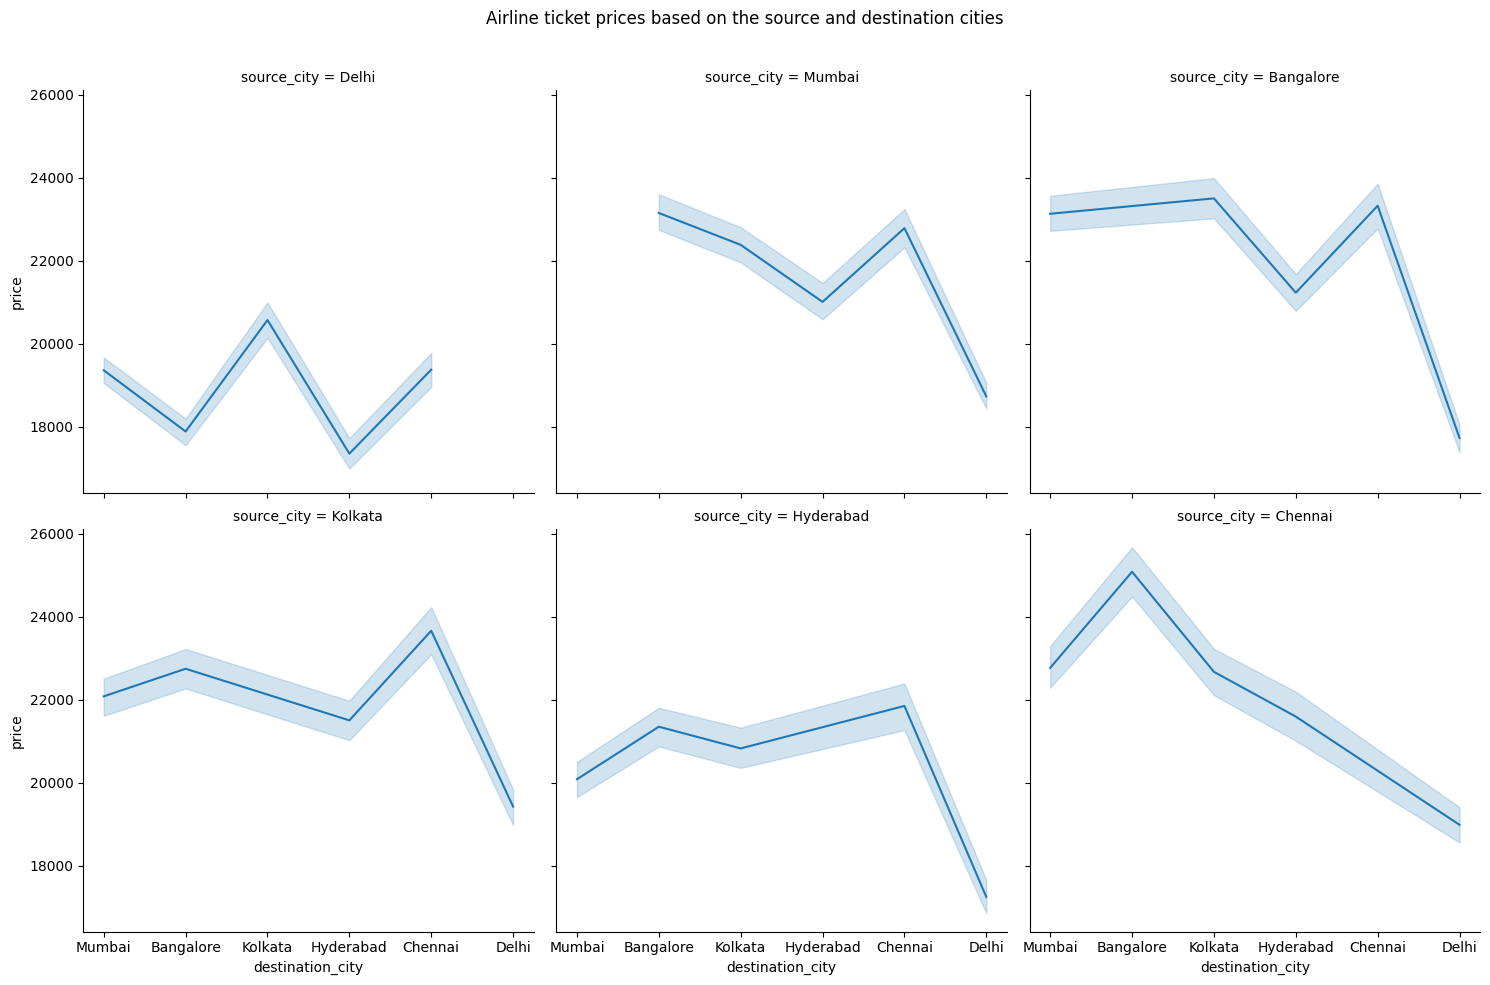

In [20]:
# 9. How does ticket price vary depending on source and destination?
# Flights from Delhi are usually cheaper due to strong connectivity and high frequency, while Chennai–Bangalore is the most expensive route and Hyderabad the costliest city to fly to.

ax = sns.relplot(x = 'destination_city', y = 'price', col='source_city', col_wrap= 3, kind= 'line', data = df)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline ticket prices based on the source and destination cities')
plt.show(ax)
     

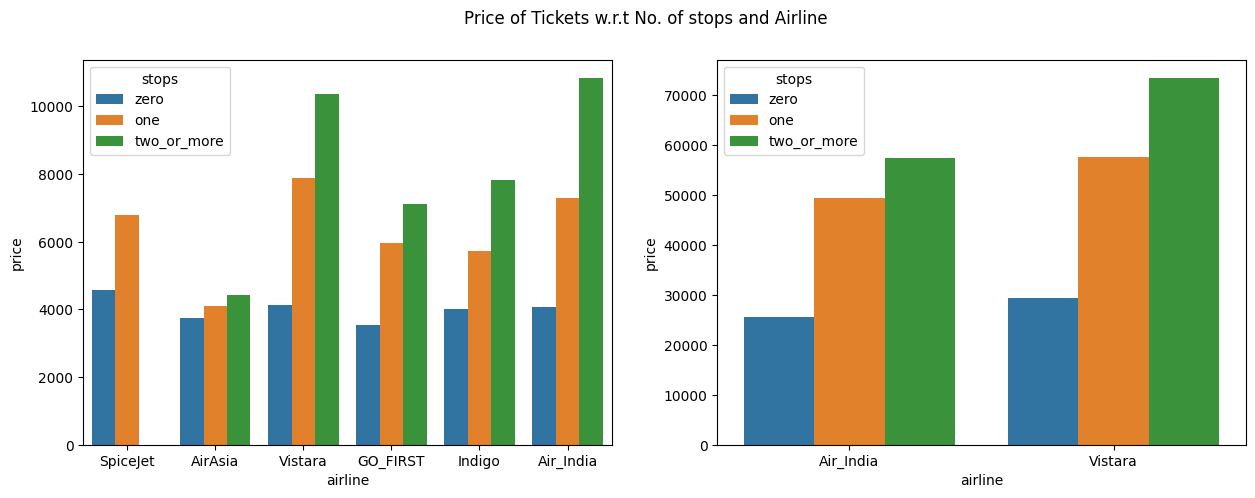

In [22]:
# 10. How does price of tickets vary based on no. of stops and airline?
# Flights with no stops are cheapest, followed by one-stop flights, while two-stop flights are the most expensive.

fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(x = 'airline', y = 'price', hue = 'stops', data = df.loc[df['class'] == 'Economy'], errorbar = None, ax = axes[0])
sns.barplot(x = 'airline', y = 'price', hue = 'stops', data = df.loc[df['class'] == 'Business'], errorbar = None, ax = axes[1])
plt.suptitle('Price of Tickets w.r.t No. of stops and Airline')
plt.show()
# --- IGNORE ---
